#### V Gene data analysis

In [6]:
cd ..

/home/romi/projects/preTCR


In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
import os, sys
import pandas as pd
from matplotlib import pyplot as plt

SRC_DIR = "cvc"
assert os.path.isdir(SRC_DIR), f"Cannot find src dir: {SRC_DIR}"
sys.path.append(SRC_DIR)
MODEL_DIR = os.path.join(SRC_DIR, "models")
sys.path.append(MODEL_DIR)

FILT_EDIT_DIST = True

PLOT_DIR = os.path.join(os.path.dirname(SRC_DIR), "plots/CDR3_data_plots")
if not os.path.isdir(PLOT_DIR):
    os.makedirs(PLOT_DIR)
PLOT_DIR


'plots/CDR3_data_plots'

#### Load Data

In [114]:
temp_dat = pd.read_csv('/home/romi/projects/preTCR/CDR3_data/vgene_embed_full_data.csv')

In [115]:
temp_dat.loc[temp_dat.vGeneName == 'TCRBVA-01', 'vGeneName'] = 'TCRBV31-01'

In [118]:
temp_dat.loc[:, 'vgene_num'] = temp_dat.vGeneName.apply(lambda x: float(x.split('TCRBV')[1].replace('-', '.').split('/')[0]))

In [119]:
temp_dat.corr('spearman')

,Unnamed: 0,Appearances,Private_Public_label,vgene_num
Unnamed: 0,1.000000,-0.108497,-0.107551,-0.377698
Appearances,-0.108497,1.000000,0.999859,0.060915
Private_Public_label,-0.107551,0.999859,1.000000,0.060191
vgene_num,-0.377698,0.060915,0.060191,1.000000


<AxesSubplot:title={'center':'Private vgenes'}>

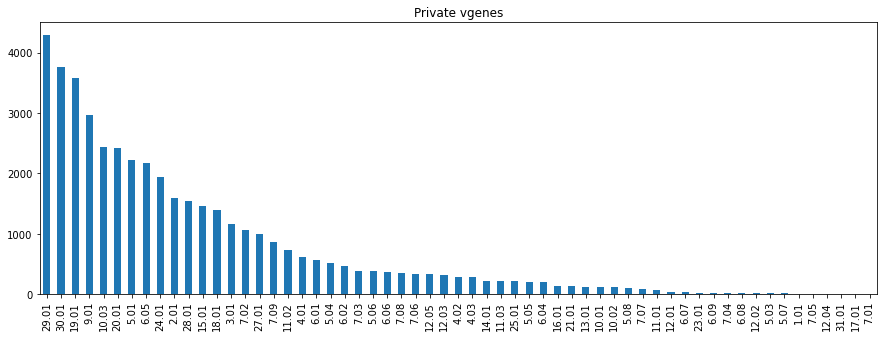

In [122]:
plt.figure(figsize=(15,5))
temp_dat[temp_dat['Private_Public_label'] == 1].vgene_num.value_counts().plot(kind='bar', title='Private vgenes')

<AxesSubplot:>

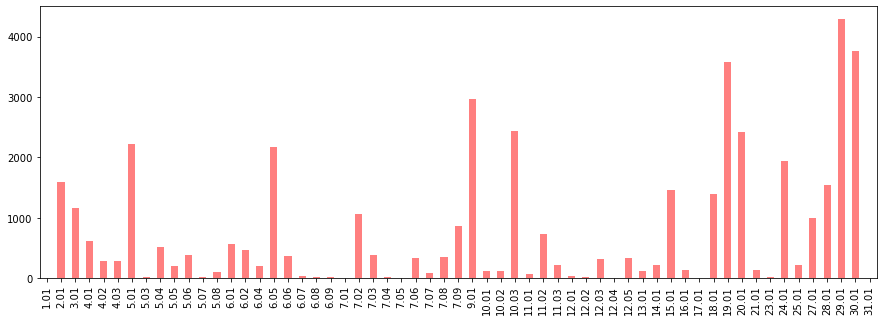

In [123]:
plt.figure(figsize=(15,5))
temp_dat[temp_dat['Private_Public_label'] == 1].vgene_num.value_counts().sort_index().plot(kind='bar', color='red', alpha=0.5)

<AxesSubplot:>

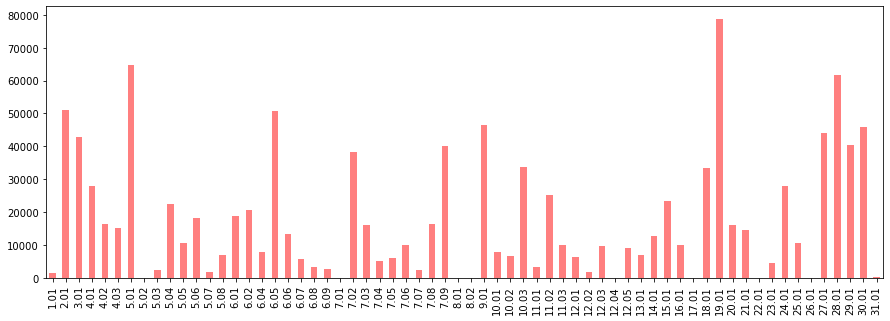

In [124]:
plt.figure(figsize=(15,5))
temp_dat.vgene_num.value_counts().sort_index().plot(kind='bar', color='red', alpha=0.5, label='Private')

<AxesSubplot:>

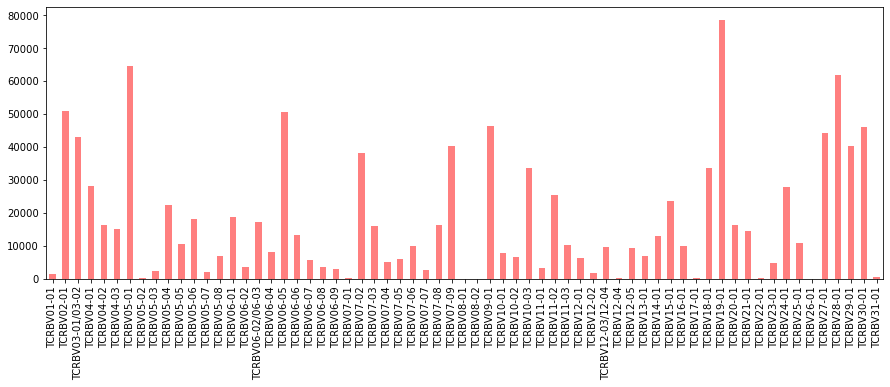

In [105]:
plt.figure(figsize=(15,5))
temp_dat.vGeneName.value_counts().sort_index().plot(kind='bar', color='red', alpha=0.5, label='Private')

<AxesSubplot:>

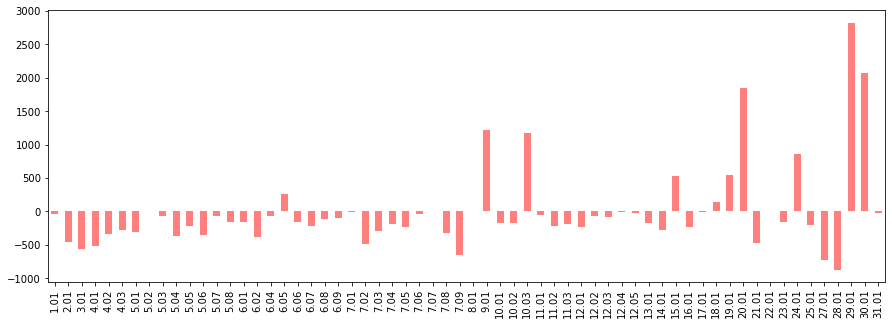

In [125]:
num_public = len(temp_dat[temp_dat['Private_Public_label'] == 1])
counts_pub = temp_dat[temp_dat['Private_Public_label'] == 1].vgene_num.value_counts().sort_index()
counts_priv = temp_dat[temp_dat['Private_Public_label'] == 0].sample(num_public).vgene_num.value_counts().sort_index()

# calculate the difference between the two
diff = counts_pub - counts_priv

# plot the difference
plt.figure(figsize=(15,5))
diff.plot(kind='bar', color='red', alpha=0.5, label='Public - Private')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


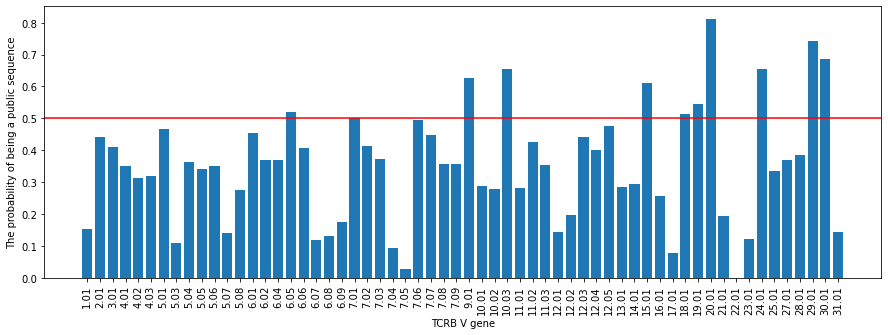

In [140]:
temp_dat_pub = temp_dat[temp_dat['Private_Public_label'] == 1]
temp_dat_priv = temp_dat[temp_dat['Private_Public_label'] == 0]
len_pub = len(temp_dat_pub)
temp_dat_balanced = pd.concat([temp_dat_pub, temp_dat_priv.sample(len_pub)])

percent_public_df = []
for tcrb_val in temp_dat_balanced.vgene_num.unique():
    # calc the correlation to Private_Public_label
    percent_public = temp_dat_balanced[temp_dat_balanced.vgene_num == tcrb_val].Private_Public_label.mean()
    percent_public_df.append({'vgene_num': tcrb_val, 'percent_public': percent_public})

percent_public_df = pd.DataFrame(percent_public_df)
percent_public_df = percent_public_df.sort_values('vgene_num')

plt.figure(figsize=(15, 5))
# bar plot
plt.bar(percent_public_df.vgene_num.astype(str), percent_public_df.percent_public)
# set x label
plt.xlabel('TCRB V gene')
# set y label
plt.ylabel('The probability of being a public sequence')
plt.xticks(rotation=90)
plt.axhline(0.5, color='r')

In [139]:
temp_dat_balanced[temp_dat_balanced.vgene_num == 22.01].Private_Public_label

0